In [4]:
from sympy import *
import numpy as np
from IPython.display import display
import matplotlib.pyplot as plt
import os
import pandas as pd
import fenics as fe

In [26]:
# Test Parameter
ConstitutiveModels = ['NeoHookean','Ogden']
ConstitutiveModel = ConstitutiveModels[0]
StretchRange  = [0.1, 5.0]                   # Stretch ratio interval
DeltaStretch  =  0.01                        # Step size

Nelements = 2

# Material Parameters
LambdaValue =  1E6   # 1st Lamé parameter
MuValue     =  660   # 2nd Lamé parameter (Shear modulus) (Pa)

C01Value    =  0.00  # Mooney-Rivlin 3rd material constant (Pa) if == 0 => Neo-Hookean
JmValue     =  0.08  # Gent 3rd material constant (-) if == 1 => ~Neo-Hookean with ln
BetaValue   =  20.3  # Demiray 3rd material constant (-) if == 1 => ~Neo-Hookean with exp
AlphaValue  = -24.3  # Ogden 3rd material constant (-) if == 2 => Neo-Hookean

FEA_Path = os.path.join('Results','Compressible','Ideal Boundary Conditions')
Analytical_Path = os.path.join('..','AnalyticalSolutions','Results','Compressible')

if ConstitutiveModel == ConstitutiveModels[0]:
    FEAFileName = 'TensionCompression_Lambda' + str(LambdaValue/1E6) + 'E6_Mu' + str(MuValue)
    AnalyticalFileName = 'Lambda' + str(LambdaValue/1E6) + 'E6_Mu' + str(MuValue)
    
elif ConstitutiveModel == ConstitutiveModels[1]:
    FEAFileName = 'TensionCompression_Lambda' + str(LambdaValue/1E6) + 'E6_Mu' + str(MuValue) + '_Alpha' + str(AlphaValue)
    AnalyticalFileName = 'Lambda' + str(LambdaValue/1E6) + 'E6_Mu' + str(MuValue) + '_Alpha' + str(AlphaValue)

AnalyticalStress = pd.read_csv(os.path.join(Analytical_Path,ConstitutiveModel,AnalyticalFileName+'.csv'))
FEAStress = pd.read_csv(os.path.join(FEA_Path,ConstitutiveModel,str(Nelements)+' Elements',FEAFileName+'.csv'))

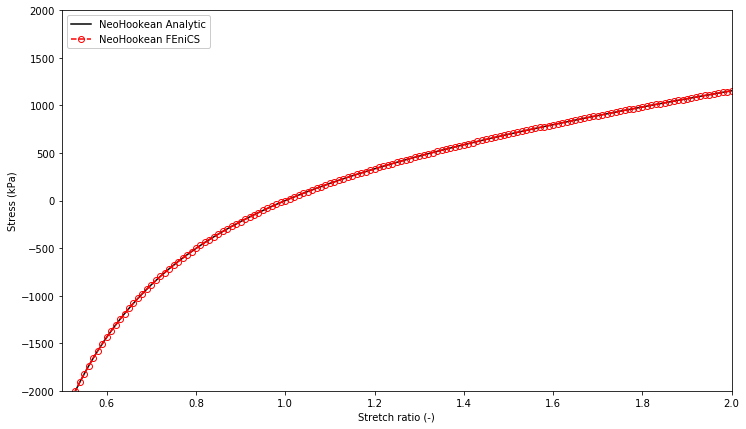

In [27]:
# Plot Results
Columns = AnalyticalStress.columns
Colors = ['Black','Red','Blue','Green','Magenta','Cyan']
Figure, Axes  = plt.subplots(1, figsize=(12,7))
Axes.plot(AnalyticalStress['Stretch ratio (-)'], AnalyticalStress[ConstitutiveModel+' Pzz (Pa)'], color = 'Black', linestyle = '-', label= ConstitutiveModel + ' Analytic')
Axes.plot(FEAStress['Stretch Ratio (-)'], FEAStress['Stress (Pa)'], color = 'Red', linestyle = '--', marker='o', fillstyle='none', label= ConstitutiveModel + ' FEniCS')
Axes.set_xlabel('Stretch ratio (-)')
Axes.set_ylabel('Stress (kPa)')
Axes.set_xlim([0.5,2])
Axes.set_ylim([-2E3,2E3])
plt.legend(loc='upper left', frameon=True, framealpha=1)
plt.savefig(os.path.join('Plots', ConstitutiveModel + 'CompressibleComparison.pdf'))
plt.show()